# Pandas

- Analyse 2D or multi dimensional data 
- Table like data 
- Internally they use numpy

In [1]:
# %pip install pandas

## Creating data

- Dictionaries
- import from csv

final dat will be a DataFrame (Table)

In [2]:
import pandas as pd


In [3]:
data = {
    'Name': ['John', 'Anna', 'Peter', 'Linda'],
    'Age': [28, 34, 29, 32],
    'City': ['New York', 'Paris', 'Berlin', 'London']
}

data

{'Name': ['John', 'Anna', 'Peter', 'Linda'],
 'Age': [28, 34, 29, 32],
 'City': ['New York', 'Paris', 'Berlin', 'London']}

In [4]:
df = pd.DataFrame(data)
df

,Name,Age,City
0,John,28,New York
1,Anna,34,Paris
2,Peter,29,Berlin
3,Linda,32,London


### Filerting column

In SQL:
```sql
SELECT name FROM df
```

In [5]:
df['Name']

0     John
1     Anna
2    Peter
3    Linda
Name: Name, dtype: object

In [6]:
print(type(df))
print(type(df['Name']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


python dataframes faster than databases as it is kept in memory 

Filtering rows using `head(index)` 

In [7]:
df.head(2)

,Name,Age,City
0,John,28,New York
1,Anna,34,Paris


## Info 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    4 non-null      object
 1   Age     4 non-null      int64 
 2   City    4 non-null      object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [9]:
print(df.shape) # rows and columns (dimensions of dataframe)
df.dtypes # Datatypes

(4, 3)


Name    object
Age      int64
City    object
dtype: object

In [10]:
df.columns

Index(['Name', 'Age', 'City'], dtype='object')

In [11]:
display(df.describe()) # info only on numeric columns
df.describe(include="all") 

,Age
count,4.000000
mean,30.750000
std,2.753785
min,28.000000
25%,28.750000
50%,30.500000
75%,32.500000
max,34.000000


,Name,Age,City
count,4,4.000000,4
unique,4,NaN,4
top,John,NaN,New York
freq,1,NaN,1
mean,NaN,30.750000,NaN
std,NaN,2.753785,NaN
min,NaN,28.000000,NaN
25%,NaN,28.750000,NaN
50%,NaN,30.500000,NaN
75%,NaN,32.500000,NaN


Data grabbed from tips.csv

In [12]:
tips_df = pd.read_csv("./tips.csv") # can pass url to read data 
tips_df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Select Day, Time, Tip

In [14]:
tips_df[['day','time','tip']] # multiple column 

,day,time,tip
0,Sun,Dinner,1.01
1,Sun,Dinner,1.66
2,Sun,Dinner,3.50
3,Sun,Dinner,3.31
4,Sun,Dinner,3.61
...,...,...,...
239,Sat,Dinner,5.92
240,Sat,Dinner,2.00
241,Sat,Dinner,2.00
242,Sat,Dinner,1.75


In [15]:
tips_df.describe().mean()

total_bill    47.729794
tip           33.480552
size          32.690096
dtype: float64

Adding a new column

In [16]:
display(tips_df[['tip','size']].head(5))
tips_df['tips_per_person'] =tips_df['tip']/tips_df['size']
tips_df.tail(10)

,tip,size
0,1.01,2
1,1.66,3
2,3.50,3
3,3.31,2
4,3.61,4


,total_bill,tip,sex,smoker,day,time,size,tips_per_person
234,15.53,3.00,Male,Yes,Sat,Dinner,2,1.500000
235,10.07,1.25,Male,No,Sat,Dinner,2,0.625000
236,12.60,1.00,Male,Yes,Sat,Dinner,2,0.500000
237,32.83,1.17,Male,Yes,Sat,Dinner,2,0.585000
238,35.83,4.67,Female,No,Sat,Dinner,3,1.556667
239,29.03,5.92,Male,No,Sat,Dinner,3,1.973333
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1.000000
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1.000000
242,17.82,1.75,Male,No,Sat,Dinner,2,0.875000
243,18.78,3.00,Female,No,Thur,Dinner,2,1.500000


### Find the percentage that people are tipping 
- percentage 
- add as another column - tip_percentage
- round to 2 decimall points
- `20.34` not be `0.2034`

In [17]:
tips_df['tip_percentage'] = round(tips_df['tip']/tips_df['total_bill'] * 100,2)
tips_df.head(5)

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,0.553333,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,1.166667,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,1.655000,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,0.902500,14.68


In [18]:
tips_df.sort_values(by='total_bill')
tips_df.sort_values(by='tip', ascending=False)
tips_df.sort_values(by='tip_percentage', ascending=False).head(5)

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percentage
172,7.25,5.15,Male,Yes,Sun,Dinner,2,2.575,71.03
178,9.60,4.00,Female,Yes,Sun,Dinner,2,2.000,41.67
67,3.07,1.00,Female,Yes,Sat,Dinner,1,1.000,32.57
232,11.61,3.39,Male,No,Sat,Dinner,2,1.695,29.20
183,23.17,6.50,Male,Yes,Sun,Dinner,4,1.625,28.05


## Task 1
Filter the rows where people dined on a sunday 

In [19]:
tips_df[tips_df['day']=="Sun"].head(5)

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,0.553333,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,1.166667,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,1.655000,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,0.902500,14.68


In [20]:
tips_df[tips_df['day']=="Sun"].head(5).shape[0] # row
tips_df[tips_df['day']=="Sun"].head(5).shape[0] # Column


5

## Task 2
Get the rows where the person has tipped more than R3 on a Friday 

In SQL:
```sql
SELECT * FROM tips_df
WHERE day = "Fri" and tip > 3
```

In [21]:
tips_fri = tips_df[tips_df['day']=="Fri"]
tips_fri[tips_fri['tip'] > 3]

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percentage
91,22.49,3.50,Male,No,Fri,Dinner,2,1.7500,15.56
93,16.32,4.30,Female,Yes,Fri,Dinner,2,2.1500,26.35
94,22.75,3.25,Female,No,Fri,Dinner,2,1.6250,14.29
95,40.17,4.73,Male,Yes,Fri,Dinner,4,1.1825,11.77
96,27.28,4.00,Male,Yes,Fri,Dinner,2,2.0000,14.66
221,13.42,3.48,Female,Yes,Fri,Lunch,2,1.7400,25.93


In [22]:
print((tips_df['tip'] > 3).value_counts()) # counts the similar items & sorts in descending - group by with count

tip
False    146
True      98
Name: count, dtype: int64


Binary operations
- & -> and
- |-> or

In [23]:

tips_df[(tips_df['tip'] > 3) & (tips_df['day'] == 'Fri')]

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percentage
91,22.49,3.50,Male,No,Fri,Dinner,2,1.7500,15.56
93,16.32,4.30,Female,Yes,Fri,Dinner,2,2.1500,26.35
94,22.75,3.25,Female,No,Fri,Dinner,2,1.6250,14.29
95,40.17,4.73,Male,Yes,Fri,Dinner,4,1.1825,11.77
96,27.28,4.00,Male,Yes,Fri,Dinner,2,2.0000,14.66
221,13.42,3.48,Female,Yes,Fri,Lunch,2,1.7400,25.93


## Task 3 
Extended task 2 - top 5 tips on a friday 

In [24]:
tips_fri.sort_values(by='tip',ascending=False).head(5)

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percentage
95,40.17,4.73,Male,Yes,Fri,Dinner,4,1.1825,11.77
93,16.32,4.30,Female,Yes,Fri,Dinner,2,2.1500,26.35
96,27.28,4.00,Male,Yes,Fri,Dinner,2,2.0000,14.66
91,22.49,3.50,Male,No,Fri,Dinner,2,1.7500,15.56
221,13.42,3.48,Female,Yes,Fri,Lunch,2,1.7400,25.93


In [25]:
tips_df[tips_df['day']=='Fri'].sort_values(by='tip',ascending=False).head(5)

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percentage
95,40.17,4.73,Male,Yes,Fri,Dinner,4,1.1825,11.77
93,16.32,4.30,Female,Yes,Fri,Dinner,2,2.1500,26.35
96,27.28,4.00,Male,Yes,Fri,Dinner,2,2.0000,14.66
91,22.49,3.50,Male,No,Fri,Dinner,2,1.7500,15.56
221,13.42,3.48,Female,Yes,Fri,Lunch,2,1.7400,25.93


## Task 4
Large Parties: people are 5 or more or spend more than R35 

In [26]:
tips_df[(tips_df['size']>=5) | (tips_df['total_bill']>=35)]

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percentage
11,35.26,5.00,Female,No,Sun,Dinner,4,1.250000,14.18
23,39.42,7.58,Male,No,Sat,Dinner,4,1.895000,19.23
56,38.01,3.00,Male,Yes,Sat,Dinner,4,0.750000,7.89
59,48.27,6.73,Male,No,Sat,Dinner,4,1.682500,13.94
95,40.17,4.73,Male,Yes,Fri,Dinner,4,1.182500,11.77
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.833333,5.64
112,38.07,4.00,Male,No,Sun,Dinner,3,1.333333,10.51
125,29.80,4.20,Female,No,Thur,Lunch,6,0.700000,14.09
141,34.30,6.70,Male,No,Thur,Lunch,6,1.116667,19.53
142,41.19,5.00,Male,No,Thur,Lunch,5,1.000000,12.14


In [27]:
#Dot syntax or Box syntax 
tips_df.tip # This is fine

tips_df["size"].head(2) # --> size attribute all df or space in the column name

0    2
1    3
Name: size, dtype: int64

## Data Exploration
- give valuable results to a company 

Try to explore and make sense of the data and find trends

## Summerisation 

- Filter row, columns
- Head, tail - Limit
- sort_values - rder by
- Conditionals with operators

## slicing 
- loc
- iloc - index

In [28]:
tips_df.head(6)

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,0.553333,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,1.166667,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,1.655000,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,0.902500,14.68
5,25.29,4.71,Male,No,Sun,Dinner,4,1.177500,18.62


In [29]:
display(tips_df.iloc[3])

tips_df.iloc[3:5]

total_bill          23.68
tip                  3.31
sex                  Male
smoker                 No
day                   Sun
time               Dinner
size                    2
tips_per_person     1.655
tip_percentage      13.98
Name: 3, dtype: object

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percentage
3,23.68,3.31,Male,No,Sun,Dinner,2,1.6550,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,0.9025,14.68


In [30]:
display(tips_df.loc[3])

tips_df.loc[3:5]

total_bill          23.68
tip                  3.31
sex                  Male
smoker                 No
day                   Sun
time               Dinner
size                    2
tips_per_person     1.655
tip_percentage      13.98
Name: 3, dtype: object

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percentage
3,23.68,3.31,Male,No,Sun,Dinner,2,1.6550,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,0.9025,14.68
5,25.29,4.71,Male,No,Sun,Dinner,4,1.1775,18.62


In [31]:
# tips_df.tail(6).loc[1] # Error - matches the value & not the row position 

tips_df.tail(6).iloc[1] # second pos due to the index starting at 0
tips_df.tail(6).iloc[2:4] # row position

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percentage
240,27.18,2.0,Female,Yes,Sat,Dinner,2,1.0,7.36
241,22.67,2.0,Male,Yes,Sat,Dinner,2,1.0,8.82


In [32]:
tips_df.tail(6).loc[239:241, ['tip'] ]
tips_df.tail(6).loc[239:241, ['tip', 'size'] ]
tips_df.tail(6).loc[239:241, 'tip': 'day' ]

,tip,sex,smoker,day
239,5.92,Male,No,Sat
240,2.00,Female,Yes,Sat
241,2.00,Male,Yes,Sat


In [33]:
tips_df.tail(6).iloc[2:4, 1:5]

,tip,sex,smoker,day
240,2.0,Female,Yes,Sat
241,2.0,Male,Yes,Sat


## Task
Find the rows with highest tip_percentage skip the first 5 on a Weekend (Sat & Sun)

In [34]:
weekend = ['Sat','Sun']

weekend_highest_percentage = tips_df[(tips_df['day'] == "Sat") | (tips_df['day'] == "Sun")].sort_values(by= "tip_percentage", ascending=False).iloc[5:]
weekend_highest_percentage

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percentage
109,14.31,4.00,Female,Yes,Sat,Dinner,2,2.000000,27.95
51,10.29,2.60,Female,No,Sun,Dinner,2,1.300000,25.27
181,23.33,5.65,Male,Yes,Sun,Dinner,2,2.825000,24.22
185,20.69,5.00,Male,No,Sun,Dinner,5,1.000000,24.17
174,16.82,4.00,Male,Yes,Sun,Dinner,2,2.000000,23.78
...,...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.400000,6.57
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000,5.94
57,26.41,1.50,Female,No,Sat,Dinner,2,0.750000,5.68
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.833333,5.64


In [35]:
tips_df[tips_df['day'].isin(['Sat','Sun'])].sort_values(by= "tip_percentage", ascending=False).iloc[5:]

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percentage
109,14.31,4.00,Female,Yes,Sat,Dinner,2,2.000000,27.95
51,10.29,2.60,Female,No,Sun,Dinner,2,1.300000,25.27
181,23.33,5.65,Male,Yes,Sun,Dinner,2,2.825000,24.22
185,20.69,5.00,Male,No,Sun,Dinner,5,1.000000,24.17
174,16.82,4.00,Male,Yes,Sun,Dinner,2,2.000000,23.78
...,...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.400000,6.57
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000,5.94
57,26.41,1.50,Female,No,Sat,Dinner,2,0.750000,5.68
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.833333,5.64


## Task 2 

Final result should only include tip_percent, day, tip, total_bill

In [36]:
# tips_df[(tips_df['day'] == "Sat") | (tips_df['day'] == "Sun")].sort_values(by= "tip_percentage", ascending=False).iloc[5:].loc[:,['tip_percentage','day','tip', 'total_bill']]
display(weekend_highest_percentage.loc[:,['tip_percentage','day','tip', 'total_bill']])
display(weekend_highest_percentage[['tip_percentage','day','tip', 'total_bill']])

,tip_percentage,day,tip,total_bill
109,27.95,Sat,4.00,14.31
51,25.27,Sun,2.60,10.29
181,24.22,Sun,5.65,23.33
185,24.17,Sun,5.00,20.69
174,23.78,Sun,4.00,16.82
...,...,...,...,...
187,6.57,Sun,2.00,30.46
0,5.94,Sun,1.01,16.99
57,5.68,Sat,1.50,26.41
102,5.64,Sat,2.50,44.30


,tip_percentage,day,tip,total_bill
109,27.95,Sat,4.00,14.31
51,25.27,Sun,2.60,10.29
181,24.22,Sun,5.65,23.33
185,24.17,Sun,5.00,20.69
174,23.78,Sun,4.00,16.82
...,...,...,...,...
187,6.57,Sun,2.00,30.46
0,5.94,Sun,1.01,16.99
57,5.68,Sat,1.50,26.41
102,5.64,Sat,2.50,44.30


## Task 3
filter the rows 2:4 index also 'tip':'day'

In [37]:
tips_df.tail(6).iloc[2:4].loc[:,'tip':'day']

,tip,sex,smoker,day
240,2.0,Female,Yes,Sat
241,2.0,Male,Yes,Sat


# Statitsics 
- mean 
- median
- sum

In [38]:
print(tips_df['tip'].mean())
print(tips_df['tip'].median())
print(tips_df['tip'].sum())

2.99827868852459
2.9
731.5799999999999


In [39]:
print(tips_df[['total_bill', 'tip']].mean())
print(tips_df[['total_bill', 'tip']].median())
print(tips_df[['total_bill', 'tip']].sum())
print(tips_df[['total_bill', 'tip']].mode())
print(tips_df[['total_bill', 'tip']].max())
print(tips_df[['total_bill', 'tip']].min())

total_bill    19.785943
tip            2.998279
dtype: float64
total_bill    17.795
tip            2.900
dtype: float64
total_bill    4827.77
tip            731.58
dtype: float64
   total_bill  tip
0       13.42  2.0
total_bill    50.81
tip           10.00
dtype: float64
total_bill    3.07
tip           1.00
dtype: float64


# Summarizing
- Bread and butter 

# Task 1
average total bill on each day 

```SQL
SELECT day, AVG(total_bill)
FROM tips_df
GROUP BY day
```

In [40]:
tips_df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

# Task 2.1
Who leaves more tip Smoker vs Non-smoker

- Total

In [41]:
tips_df.groupby('smoker')['tip'].sum()

smoker
No     451.77
Yes    279.81
Name: tip, dtype: float64

# Task 2.2
Who leaves more tip Smoker vs Non-smoker

- AVG

In [42]:
tips_df.groupby('smoker')['tip'].mean()

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64

In [43]:
tips_df.groupby('smoker').aggregate({'tip': 'sum', 'total_bill': 'mean'})
tips_df.groupby('smoker').aggregate({'tip': ['sum','mean'], 'total_bill': 'mean'})

tip           total_bill
           sum      mean       mean
smoker                             
No      451.77  2.991854  19.188278
Yes     279.81  3.008710  20.756344

# Task 3 
Based on the day the total of the total_bill and on average tip_percentage 


In [44]:
tips_df.groupby('day').aggregate({'total_bill':'sum', 'tip_percentage':'mean'})

,total_bill,tip_percentage
day,,
Fri,325.88,16.991579
Sat,1778.40,15.314598
Sun,1627.16,16.689605
Thur,1096.33,16.126452


## One more level of drilling 
- Order matter in the lsit 

In [45]:
tips_df.groupby(['smoker', 'day'])['tip'].mean()

smoker  day 
No      Fri     2.812500
        Sat     3.102889
        Sun     3.167895
        Thur    2.673778
Yes     Fri     2.714000
        Sat     2.875476
        Sun     3.516842
        Thur    3.030000
Name: tip, dtype: float64

## Unstack
transforms the result more easier to understand (pulls out the aggerate columns to a seprate column)

## Task
On an average who earns(male,female) more tip each day 

In [46]:
tips_df.groupby(['day','sex'])['tip'].mean().unstack()

sex,Female,Male
day,,
Fri,2.781111,2.693000
Sat,2.801786,3.083898
Sun,3.367222,3.220345
Thur,2.575625,2.980333


## Task 2
On an average max, min who earns(male,female) more tip each day 

In [47]:
tips_df.groupby(['day','sex']).aggregate({'tip':['mean','max','min']}).unstack()

tip                                     
          mean              max           min      
sex     Female      Male Female   Male Female  Male
day                                                
Fri   2.781111  2.693000   4.30   4.73   1.00  1.50
Sat   2.801786  3.083898   6.50  10.00   1.00  1.00
Sun   3.367222  3.220345   5.20   6.50   1.01  1.32
Thur  2.575625  2.980333   5.17   6.70   1.25  1.44

In [48]:
pd.pivot_table(tips_df,index='day',columns="smoker",values="tip", aggfunc="mean")

smoker,No,Yes
day,,
Fri,2.812500,2.714000
Sat,3.102889,2.875476
Sun,3.167895,3.516842
Thur,2.673778,3.030000


# Visualize

- matplot
    - Pioneer
    - Beginner-friendly
- seaborn
    - It uses internally matplot
    - complex visualization easily

In [49]:
# %pip install matplotlib
# %pip install matplotlib

In [50]:
# %pip install seaborn

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

## Bar graph 

Average total bill by each day  

Text(0.5, 1.0, 'Average sales in a week')

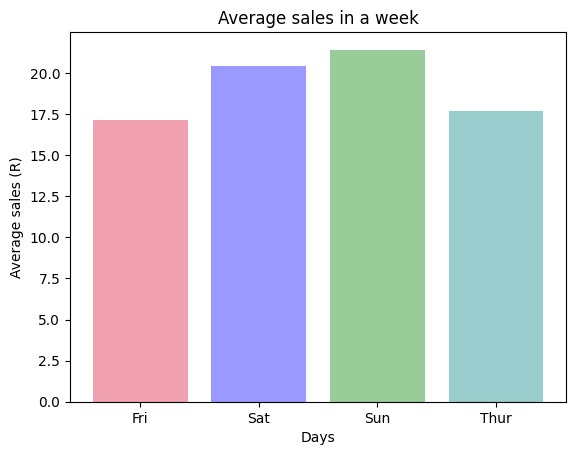

In [52]:
# x - days; y-axis avg 
x_days = tips_df['day'].unique()
y_avg_total_bill = tips_df.groupby('day')['total_bill'].mean()

plt.bar(y_avg_total_bill.index,y_avg_total_bill,color =['crimson','blue','green','teal'], alpha=0.4)
plt.xlabel("Days")
plt.ylabel("Average sales (R)")
plt.title("Average sales in a week")


<Axes: title={'center': 'Average sales in a week'}, xlabel='Days', ylabel='Average sales (R)'>

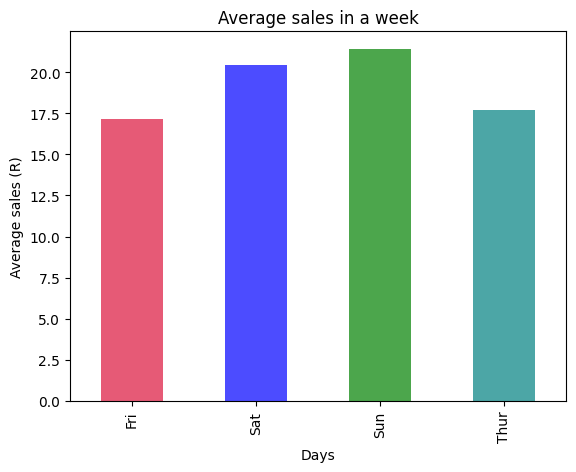

In [53]:
# Easier way

x_days = tips_df['day'].unique()
y_avg_total_bill = tips_df.groupby('day')['total_bill'].mean()

y_avg_total_bill.plot(kind="bar",title="Average sales in a week", ylabel="Average sales (R)", xlabel="Days", color= ['crimson','blue','green','teal'], alpha = 0.7)

<Axes: title={'center': 'Average sales in a week'}, ylabel='total_bill'>

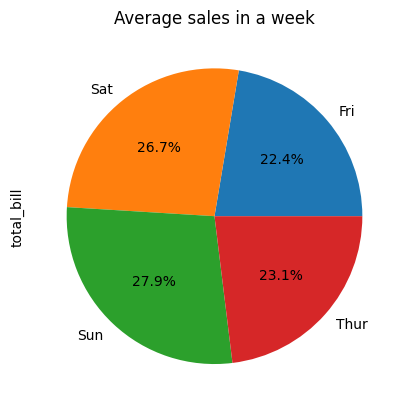

In [54]:
y_avg_total_bill.plot(kind="pie", autopct ="%1.1f%%",title="Average sales in a week") 

# Task 
Create a pie chart comparing how many times people have visted on what time of the day (Dinner, Lunch)

<Axes: title={'center': 'Proportion of Meals'}, ylabel='count'>

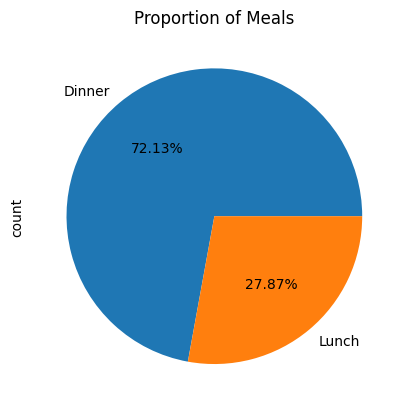

In [63]:
# proportion_of_meals = tips_df.groupby("time")["time"].count()
proportion_of_meals = tips_df["time"].value_counts()
proportion_of_meals.plot(kind="pie", autopct="%2.2f%%",title="Proportion of Meals")

## Scatter plots

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60')])

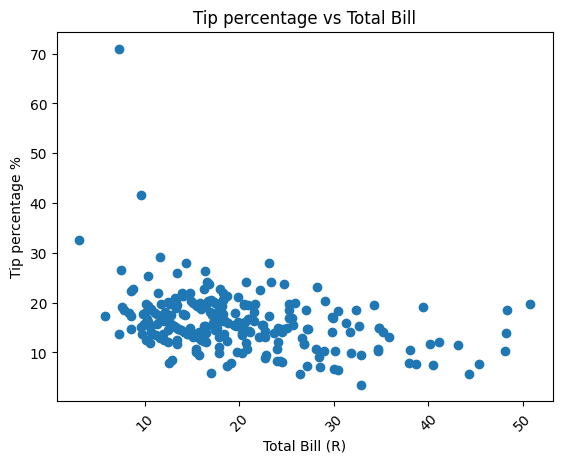

In [56]:
# x: total_bill  vs y: tip_percentage

plt.scatter(tips_df['total_bill'], tips_df['tip_percentage']) 
plt.xlabel("Total Bill (R)")
plt.ylabel("Tip percentage %")
plt.title("Tip percentage vs Total Bill")

plt.xticks(rotation =45)

## histogram 

Ticket size -  how big or small is your order size 

ticket size - Total_bill --> x-axis vs Frequency --> y-axsis

Text(0, 0.5, 'Frequency')

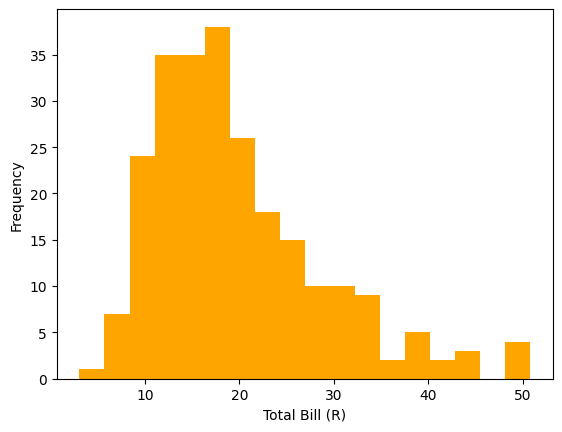

In [57]:
plt.hist(tips_df['total_bill'], color = "orange", bins=18)# more bins more clearity 
plt.xlabel("Total Bill (R)")
plt.ylabel("Frequency")

C:\Users\E1005290\AppData\Local\Temp\ipykernel_1408\2909660528.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='total_bill', data=tips_df, palette="pastel")


Text(0.5, 1.0, 'Average sales in a week')

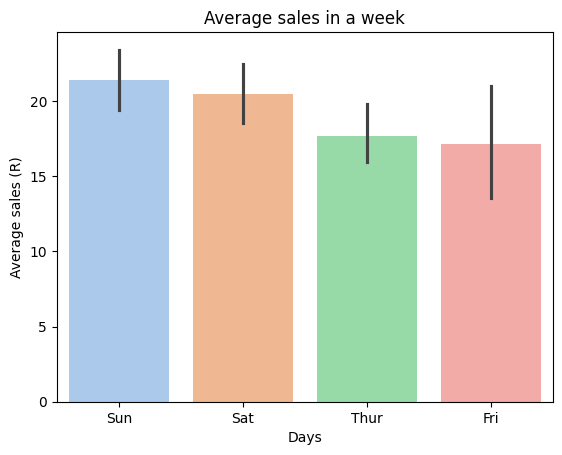

In [58]:
#x--> day vs y --> total_bill
# line gives min and max and the bar shows the average 
sns.barplot(x='day', y='total_bill', data=tips_df, palette="pastel")
plt.xlabel("Days")
plt.ylabel("Average sales (R)")
plt.title("Average sales in a week")

Text(0.5, 1.0, 'Total Bill vs Tip in Regreasion line plot')

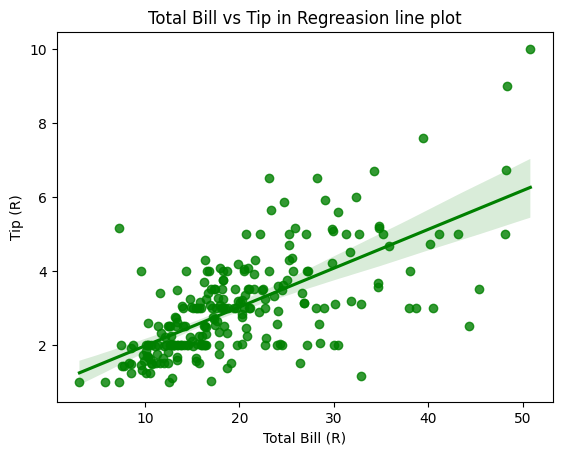

In [59]:
sns.regplot(x='total_bill', y="tip", data=tips_df, color="green")
plt.xlabel("Total Bill (R)")
plt.ylabel("Tip (R)")
plt.title("Total Bill vs Tip in Regreasion line plot")